<a href="https://colab.research.google.com/github/zec1616/cyngua/blob/main/problem_set_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [3]:
# 1a

# build a function that checks if the temperature is within ±1 degree of normal_temp
def temp_tester(normal_temp): # outer function takes a normal temperature as a parameter
    def tester(temp):         # inner function does the actual temperature testing
        return abs(temp - normal_temp) <= 1    # check if this difference is less than or equal to 1
    return tester

1b: The problem does not specify whether temperatures are assumed to be in Celsius, Fahrenheit, or Kelvin. For example, "37" is a normal human body temperature in Celsius, while "98.6" is normal in Fahrenheit. It’s important to specify the scale being used to avoid confusion.

In [4]:
# 1c

human_tester = temp_tester(37)  # normal human body temperature (in Celsius)
chicken_tester = temp_tester(41.1)  # normal chicken body temperature (in Celsius)

# Test cases
print(chicken_tester(42))  # Expected: True -- i.e. not a fever for a chicken
print(human_tester(42))    # Expected: False -- this would be a severe fever for a human
print(chicken_tester(43))  # Expected: False
print(human_tester(35))    # Expected: False -- too low
print(human_tester(98.6))  # Expected: False -- normal in degrees F but our reference temp was in degrees C

True
False
False
False
False


Question 2

In [5]:
# 2a
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
data = pd.read_csv("sample_data/us-states.csv")

# convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# verify the data is corrected load and shows its head and property
print(data.head())
print(data.info())


        date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61942 entries, 0 to 61941
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    61942 non-null  datetime64[ns]
 1   state   61942 non-null  object        
 2   fips    61942 non-null  int64         
 3   cases   61942 non-null  int64         
 4   deaths  61942 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.4+ MB
None


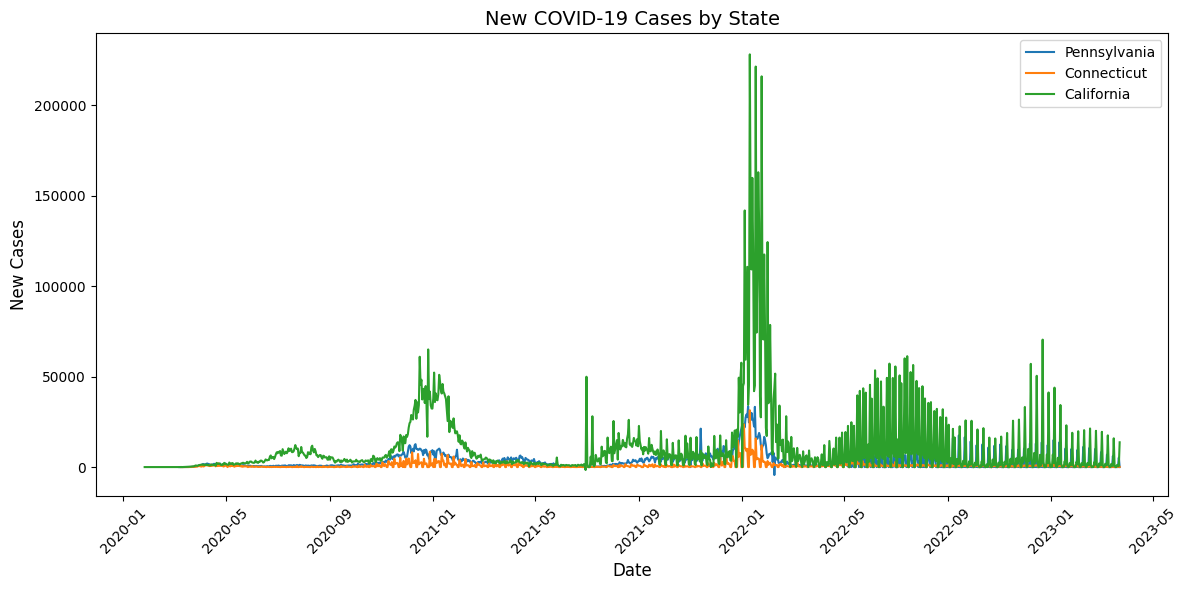

In [7]:
# 2b

# create a line plot of new COVID-19 cases for the specified states
def plot_new_cases(states):

    plt.figure(figsize=(12, 6))

    for state in states:
        state_data = data[data['state'] == state].sort_values('date')
        state_data['new_cases'] = state_data['cases'].diff()

        plt.plot(state_data['date'], state_data['new_cases'], label=state)

    # the code adds labels, a title, and a legend to the plot for clarity
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('New Cases', fontsize=12)
    plt.title('New COVID-19 Cases by State', fontsize=14)
    plt.legend()

    # finalize the plot, adjusting the layout and displaying it
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3 example states I choose
plot_new_cases(['Pennsylvania', 'Connecticut', 'California'])

## LIMITATIONS: After the period of 2022-05, the cases line of California has a unstable shift,
## while the scale of Y axis is too large, so it is hard for viewers to look thorugh the graph detaily.


In [8]:
# 2c

# filter and sort the data for the given state
# calculate the number of new cases for each date
# to find out the date with the maximum number of new cases
def find_peak_date(state):
    state_data = data[data['state'] == state].sort_values('date')
    state_data['new_cases'] = state_data['cases'].diff()
    peak_date = state_data.loc[state_data['new_cases'].idxmax(), 'date']
    return peak_date

# 1 example state I choose
print(find_peak_date('Connecticut'))

2022-01-10 00:00:00


In [9]:
# 2d

# find out the peak dates for both states using the find_peak_date function
def compare_peaks(state1, state2):
    peak1 = find_peak_date(state1)
    peak2 = find_peak_date(state2)

# calculate the number of days between these peak dates
    days_between = abs((peak1 - peak2).days)

    if peak1 < peak2:
        first_peak = state1
    else:
        first_peak = state2    # determine which state reached its peak first

    return f"{first_peak} reached its peak {days_between} days ealier than Connectcut."

# 2 example states I choose
print(compare_peaks('Connecticut', 'Pennsylvania'))


Pennsylvania reached its peak 2 days ealier than Connectcut.


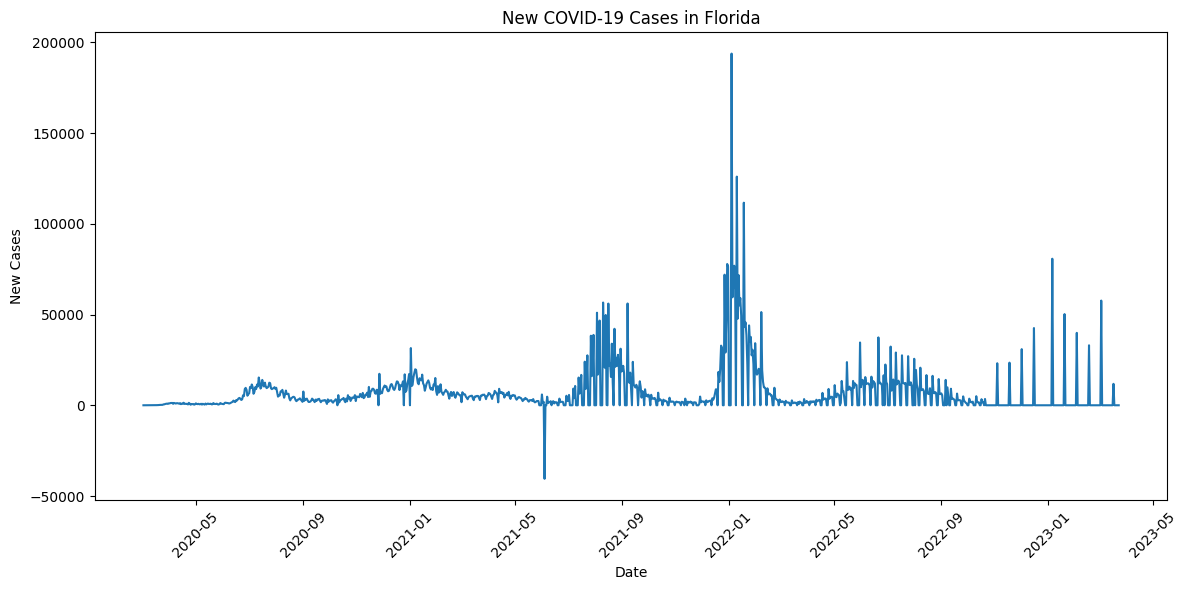

In [10]:
# 2e

# filter the data for Florida and calculate new daily cases
florida_data = data[data['state'] == 'Florida'].sort_values('date')
florida_data['new_cases'] = florida_data['cases'].diff()

# set up a plot with the date on the x-axis and new cases on the y-axis
# add labels and a title to the graph for clarity
plt.figure(figsize=(12, 6))
plt.plot(florida_data['date'], florida_data['new_cases'])
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('New COVID-19 Cases in Florida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# I found that between 2021-05 and 2021-09, there is a point that the number of cases is negative.
# It seems like an syntax error for the data entry.


Question 3

In [11]:
# 3a

import pandas as pd
import sqlite3

connection = sqlite3.connect("sample_data/hw0-population.db")

# load the data into a pandas DataFrame, SELECT * to view all columns
data = pd.read_sql_query("SELECT * FROM population", connection)

# examine the dataset by showing its column names and number of rows
print("Columns present:")
print(data.columns)

print("\nNumber of rows:")
print(data.shape[0])



Columns present:
Index(['name', 'age', 'weight', 'eyecolor'], dtype='object')

Number of rows:
152361



Age Statistics:
count    152361.000000
mean         39.510528
std          24.152760
min           0.000748
25%          19.296458
50%          38.468955
75%          57.623245
max          99.991547
Name: age, dtype: float64


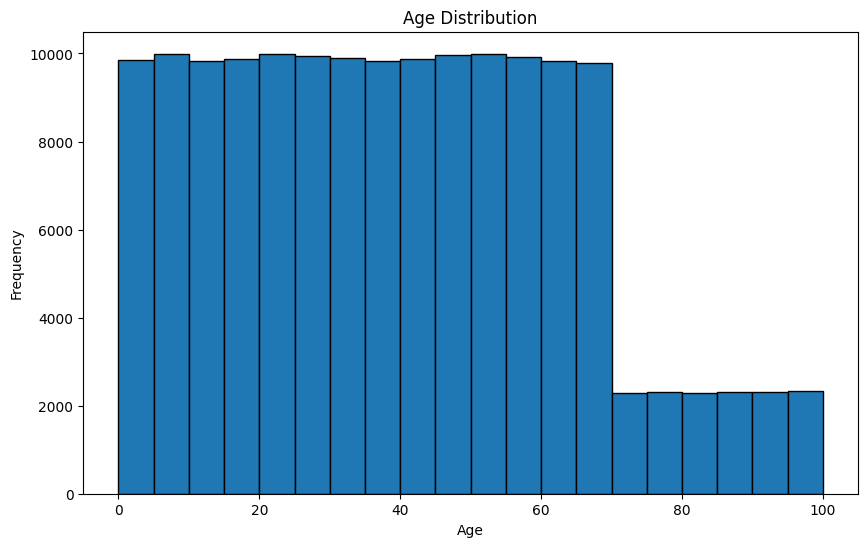

In [13]:
# 3b

# analyze Age distribution
age_stats = data['age'].describe()
print("\nAge Statistics:")   # calculates basic statistics of the 'age' column, including mean, median, and quartiles
print(age_stats)

# create a histogram to visualize the age distribution
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, edgecolor='black')  # uses 20 bins to group the ages

# the x-axis: age ranges, y-axis:frequency (count)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# The role of number of bins is to represent the age range, which provides a detailed look at age of different segmentations.
# In the diagram, one bin stands for a range of 5 years. For instance, frist bin stands for '0-5', then is '5-10',
# '10-15','15-20'...

# It can be considered as a bimodel distribution with two distinct group of samples as 1):'0-70' and 2):'70-100'
# There is no significant outlier as the distribution is uniform.



Weight Statistics:
count    152361.000000
mean         60.884134
std          18.411824
min           3.382084
25%          58.300135
50%          68.000000
75%          71.529860
max         100.435793
Name: weight, dtype: float64


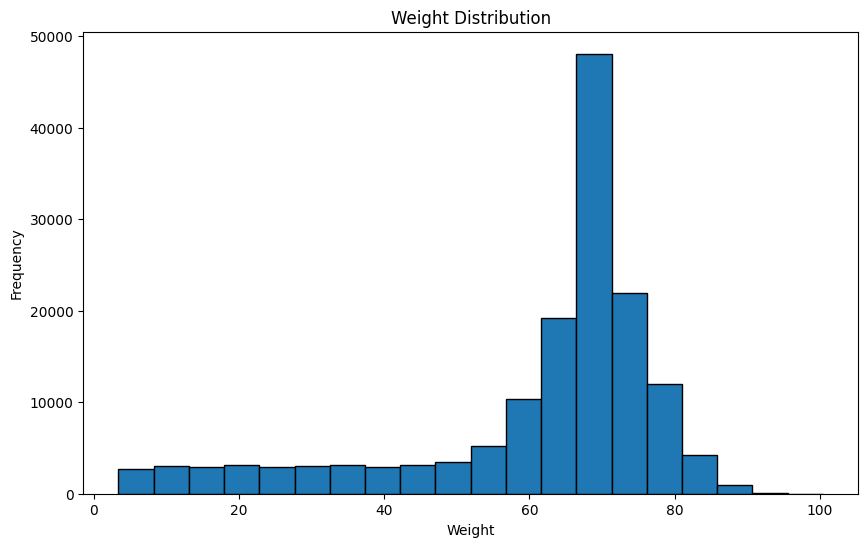

In [14]:
# 3c

# analyze Weight distribution; calculate basic statistics for the 'weight' column as mean, median, and quartiles
weight_stats = data['weight'].describe()
print("\nWeight Statistics:")
print(weight_stats)

# create a histogram with 20 bins to visually represent the weight distribution
plt.figure(figsize=(10, 6))
plt.hist(data['weight'], bins=20, edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# The weight distribution appears to be roughly normal with right skewed distribution (bell-shaped), with a peak around 60-70 units.
# Outliers: There's a group of data points on the far left of the distribution, in the range of 0-40 units.

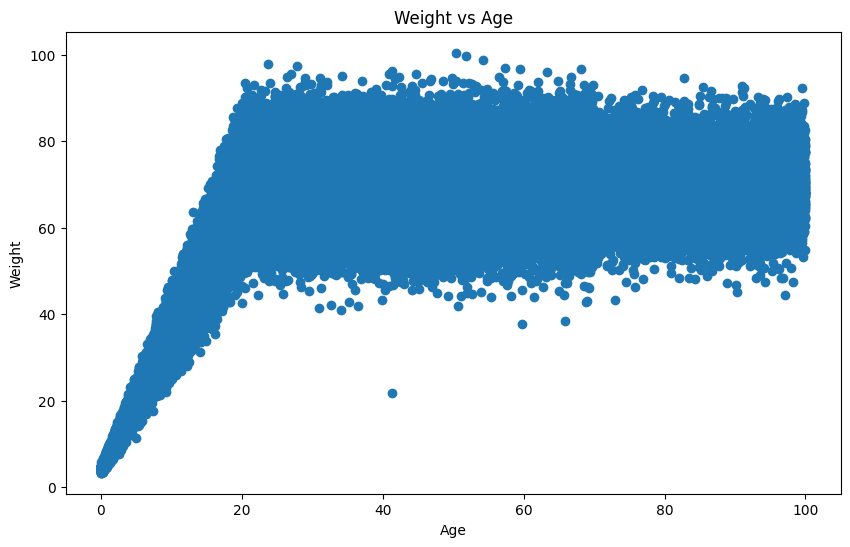


Potential outliers:
                    name       age    weight eyecolor
311        Edna Williams  0.092462  4.366853     blue
643           Ken Graser  0.014489  4.028084    brown
654      Kenneth Shevlin  0.014581  4.554047    brown
685     Harold Davenport  0.155084  4.642049    brown
930      Michael Calhoun  0.147751  4.356373     blue
...                  ...       ...       ...      ...
151720      Velvet Dever  0.419900  3.981101    brown
151788         Ray Budde  0.566617  5.432551    brown
151912    Andrew Jenkins  0.074917  5.155951    brown
151922      Ida Williams  0.562629  5.223119    green
152069     Matthew Almen  0.288013  4.942842    brown

[1035 rows x 4 columns]


In [15]:
# 3d

# create a scatter plot to visualize the relationship between age and weight
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['weight'])
plt.title('Weight vs Age')
plt.xlabel('Age')     # x-axis: age
plt.ylabel('Weight')  # y-axis: weight
plt.show()

# identify potential outliers in the weight data, calculates z-scores for weight values
# consider weight with z-scores >3 or <-3 as potential outlier
z_scores = (data['weight'] - data['weight'].mean()) / data['weight'].std()
outliers = data[abs(z_scores) > 3]
print("\nPotential outliers:")
print(outliers)

# There's a strong positive correlation between age and weight from birth to around age 20.
# After age 20, there is no significant correlation between age an weight.
# There is significant outlier point at approximately between age 42-45 with a weight of around 20.
# I can visually identify the point from directly looking at the graph.

Question 4

In [16]:
# 4a

# define a function called generate_population that creates a simulated population for statistical sampling
import random
def generate_population(n, d):      # n: total size of the population
                                    # d: number of individuals with a specific trait
    population = [True] * d + [False] * (n - d)
    random.shuffle(population)
    return population

In [17]:
# 4b

# model a sampling process with a specific survey method
def sample_and_simulate(population, s):     # population: The list representing the entire population
                                            # s: The size of the sample to be drawn
    sample = random.sample(population, s)
    responses = []
    for drug_use in sample:
        if random.choice([True, False]):  # first coin flip
            responses.append(random.choice([True, False]))  # second coin flip
        else:
            responses.append(drug_use)  # report true status
    return responses


In [30]:
# 4c

# to estimate the number of drug users in a population based on survey results
def estimate_drug_users(total_population, sample_size, positive_responses):
    proportion_positive = positive_responses / sample_size
    estimated_proportion = 2 * (proportion_positive - 0.25)
    estimated_users = estimated_proportion * total_population

    # handle negative estimates
    if estimated_users < 0:
        estimated_users = 0

    return round(estimated_users)

# define the values and assume the positive response value
total_population = 10000
true_drug_users = 500
sample_size = 1000
positive_responses = 300

# print out the estimated result
estimated_users = estimate_drug_users(total_population, sample_size, positive_responses)
print(f"Estimated number of drug users: {estimated_users}")

# # For handing negative estimates, if the estimated number of drug users is negative,
# I will set it to 0.

Estimated number of drug users: 1000


In [33]:
# 4d

# define a simulation to estimate the number of drug users in a population
# and generates a simulated population
def run_simulation(total_population, true_drug_users, sample_size):
    population = generate_population(total_population, true_drug_users)
    responses = sample_and_simulate(population, sample_size) # samples from the population and simulates survey responses
    positive_responses = sum(responses)           # estimate the number of drug users based on these responses
    estimated_users = estimate_drug_users(total_population, sample_size, positive_responses)
    return estimated_users

estimated_users = run_simulation(total_population, true_drug_users, sample_size)
print(f"Estimated number of drug users: {estimated_users}")

Estimated number of drug users: 360


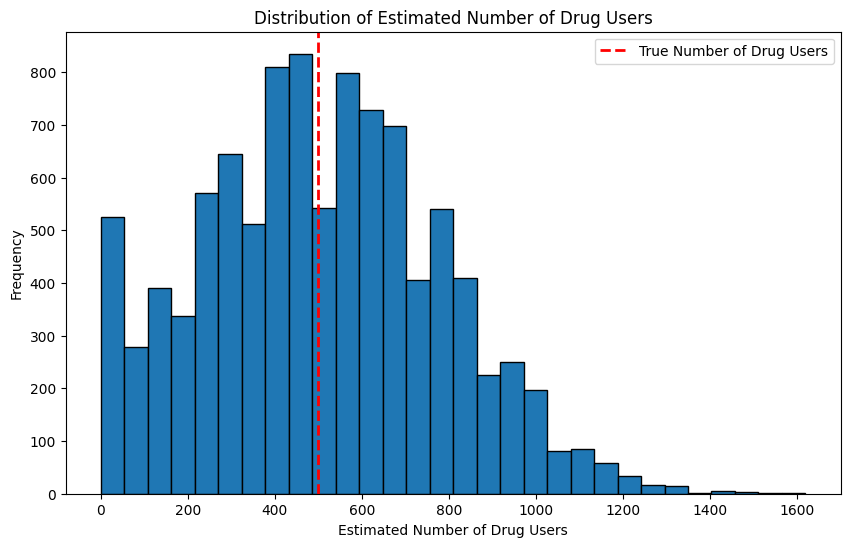

True number of drug users: 500
Mean estimate: 505.45
Median estimate: 500.00
Standard deviation of estimates: 274.08
95% confidence interval: (0.00, 1060.00)


In [36]:
# 4e
import numpy as np

# run the simulation 10000 times
num_repetitions = 10000

# repeat the experiment
estimates = [run_simulation(total_population, true_drug_users, sample_size) for _ in range(num_repetitions)]

# plot the histogram with 30 bins
plt.figure(figsize=(10, 6))
plt.hist(estimates, bins=30, edgecolor='black')
plt.title('Distribution of Estimated Number of Drug Users')
plt.xlabel('Estimated Number of Drug Users')
plt.ylabel('Frequency')      # plot a red line in histogram to show the true number of drug users
plt.axvline(true_drug_users, color='r', linestyle='dashed', linewidth=2, label='True Number of Drug Users')
plt.legend()
plt.show()

# add calculated statistics as mean, standard deviation, median, and percentile
mean_estimate = np.mean(estimates)
std_estimate = np.std(estimates)
median_estimate = np.median(estimates)
confidence_interval = np.percentile(estimates, [2.5, 97.5])

# print out the result in sentences
print(f"True number of drug users: {true_drug_users}")
print(f"Mean estimate: {mean_estimate:.2f}")
print(f"Median estimate: {median_estimate:.2f}")
print(f"Standard deviation of estimates: {std_estimate:.2f}")
print(f"95% confidence interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

# The histogram shows a generally symsymmetric distribution of estimated drug users.
# In general, The mean estimate (505.45) and median estimate (500.00) are very close
# to the true number of drug users (500), which indicates that the estimation method is generally accurate.

# However, the spread of the estimates is quite wide, ranging from 0 to over 1600.
# It indicates that individual estimates can be highly imprecise,
# which far from the true value of 500. These relatively infrequent extreme estimates represent large errors.
# And the standard deviation of 274.08 is quite large relative to the true value.

Simulating 500 users: 100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


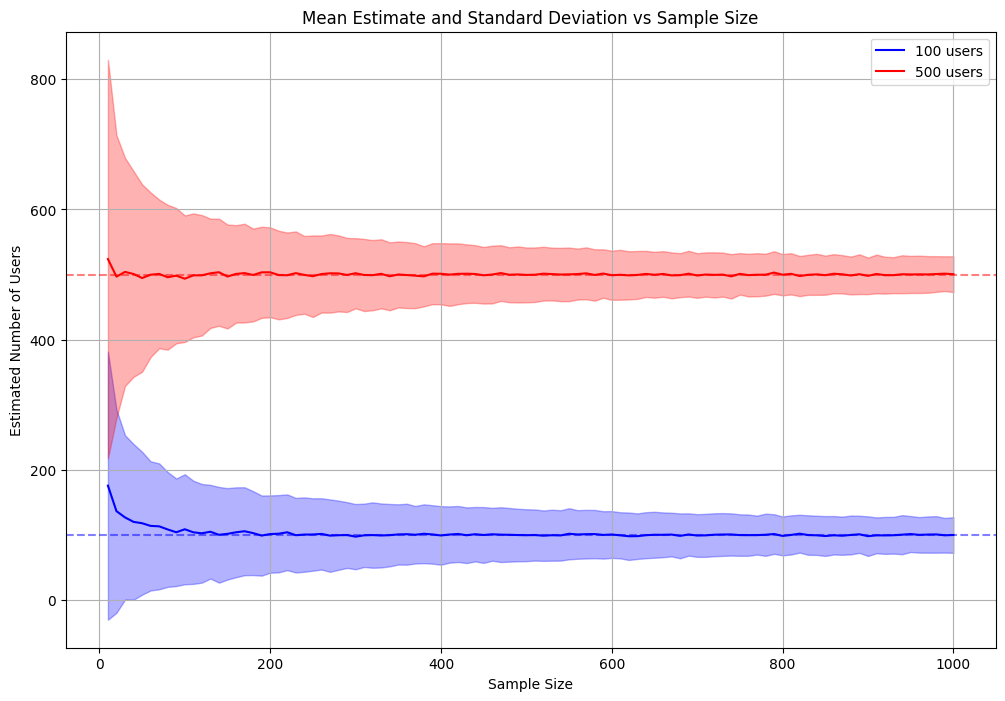


Scenario: 100 users
Final mean estimate (sample size 1000): 100.01
Final standard deviation (sample size 1000): 27.36

Scenario: 500 users
Final mean estimate (sample size 1000): 500.59
Final standard deviation (sample size 1000): 27.49


In [37]:
# 4f
from tqdm import tqdm

# perform multiple simulations of drug use estimation across different sample sizes
def run_simulations(total_population, true_users, sample_sizes, num_simulations):
    results = []
    # iterate
    for sample_size in tqdm(sample_sizes, desc=f"Simulating {true_users} users"):
        estimates = []
        # generate a population once for each sample size
        population = generate_population(total_population, true_users)
    # run simulations for this sample size, count positibe responses and
    # estimate the number of drug users
        for _ in range(num_simulations):
            responses = sample_and_simulate(population, sample_size)
            positive_responses = sum(responses)
            estimate = estimate_drug_users(total_population, sample_size, positive_responses)
            estimates.append(estimate)
        # mean and standard deviation
        mean_estimate = np.mean(estimates)
        std_estimate = np.std(estimates)
        # store results and return all results
        results.append((sample_size, mean_estimate, std_estimate))
    return results

# parameters setting
total_population = 1000
sample_sizes = range(10, 1001, 10)
num_simulations = 1000
scenarios = [100, 500]  # number of drug users in each scenario

# run simulations for both scenarios
all_results = {}
for true_users in scenarios:
    all_results[true_users] = run_simulations(total_population, true_users, sample_sizes, num_simulations)

# plot the grpah; define parameters
plt.figure(figsize=(12, 8))     # blue color one is the 100 sample size
                                # red color one is the 500 sample size
colors = ['blue', 'red']
labels = ['100 users', '500 users']

# loop through each scenario (100 users and 500 users)
for i, true_users in enumerate(scenarios):
    results = all_results[true_users]
    sample_sizes, means, stds = zip(*results)

    # add shaded area for standard deviation
    plt.plot(sample_sizes, means, color=colors[i], label=labels[i])
    plt.fill_between(sample_sizes,
                     np.array(means) - np.array(stds),
                     np.array(means) + np.array(stds),
                     alpha=0.3, color=colors[i])

# set the parameters and plot the graph
# label the x-axis: sample size, y-axis: estimated number of users
# blue dashed line as the 100 number of users reference line
# red dashed line as the 500 number of users reference line
plt.axhline(y=100, color='blue', linestyle='--', alpha=0.5)
plt.axhline(y=500, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Sample Size')
plt.ylabel('Estimated Number of Users')
plt.title('Mean Estimate and Standard Deviation vs Sample Size')
plt.legend()
plt.grid(True)
plt.show()

# print out some statistics: mean, standard deviation
for true_users in scenarios:
    results = all_results[true_users]
    final_mean = results[-1][1]
    final_std = results[-1][2]
    print(f"\nScenario: {true_users} users")
    print(f"Final mean estimate (sample size 1000): {final_mean:.2f}")
    print(f"Final standard deviation (sample size 1000): {final_std:.2f}")

# The 500 user scenario shows higher absolute variability as wider shaded are compared to the 100-user scenario.
# For both scenarios (100 and 500 users), the mean estimates converge towards their respective true values as the sample size increases.
# The most significant improvements in both accuracy and precision occur for sample sizes up to about 200-300.
# Beyond this point, the gains from increasing sample size are less substantial, showing diminishing returns.
